<a href="https://colab.research.google.com/github/WolfgangNS/OpenSNP-dendrogram/blob/main/OpenSNP_dendrogram_data_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# ChatGPT conversations:
# https://chatgpt.com/c/682ccc67-b81c-8007-af7d-770e759864f0
# https://chatgpt.com/c/682fd3c5-000c-8007-afea-13a2ec9e6ba5

# Original github R code:
# https://github.com/WolfgangNS/OpenSNP-dendrogram/blob/main/dendrogram.r
# https://stackoverflow.com/a/52517178/13903606

# Example page archive:
# https://web.archive.org/web/20250404085531/https://opensnp.org/users/5818

# Next to-do:
# include tooltip on hover
# https://plotly.com/python/hover-text-and-formatting/

### List of download links

In [1]:
pages = """https://opensnp.org/data/5811.23andme.4287
https://opensnp.org/data/5817.23andme.4293
https://opensnp.org/data/5818.23andme.4294
https://opensnp.org/data/5820.23andme.4298
https://opensnp.org/data/5821.23andme.4300
https://opensnp.org/data/5823.23andme.4302
https://opensnp.org/data/5825.23andme.4303
https://opensnp.org/data/5830.23andme.4308
https://opensnp.org/data/5831.23andme.4309
https://opensnp.org/data/5832.23andme.4310
https://opensnp.org/data/5833.23andme.4311
https://opensnp.org/data/5839.23andme.4319
https://opensnp.org/data/5841.23andme.4321
https://opensnp.org/data/5847.23andme.4325
https://opensnp.org/data/5848.23andme.4326
https://opensnp.org/data/5850.23andme.4328
https://opensnp.org/data/5853.23andme.4332
https://opensnp.org/data/5861.23andme.4337
https://opensnp.org/data/5862.23andme.4338
https://opensnp.org/data/5863.23andme.4339
https://opensnp.org/data/5865.23andme.4341
https://opensnp.org/data/5866.23andme.4342
https://opensnp.org/data/5871.23andme.4347
https://opensnp.org/data/5872.23andme.4348
https://opensnp.org/data/5876.23andme.4350
https://opensnp.org/data/5878.23andme.4352
https://opensnp.org/data/5879.23andme.4353
https://opensnp.org/data/5881.23andme.4355
https://opensnp.org/data/5882.23andme.4356
https://opensnp.org/data/5884.23andme.4358
https://opensnp.org/data/5892.23andme.4364
https://opensnp.org/data/5892.23andme.9731
https://opensnp.org/data/5892.23andme.9983
https://opensnp.org/data/5900.23andme.4370
https://opensnp.org/data/5902.23andme.4372
https://opensnp.org/data/5902.23andme.4842
https://opensnp.org/data/5909.23andme.4379
https://opensnp.org/data/5914.23andme.4384
https://opensnp.org/data/5916.23andme.4385
https://opensnp.org/data/5917.23andme.4386
https://opensnp.org/data/5918.23andme.4387
https://opensnp.org/data/5920.23andme.4388
https://opensnp.org/data/5924.23andme.4389
https://opensnp.org/data/5937.23andme.4409
https://opensnp.org/data/5941.23andme.4422
https://opensnp.org/data/5941.23andme.4423
https://opensnp.org/data/5941.23andme.4424
https://opensnp.org/data/5960.23andme.4478
https://opensnp.org/data/5973.23andme.4485
https://opensnp.org/data/5977.23andme.4493
https://opensnp.org/data/5978.23andme.4494
https://opensnp.org/data/5979.23andme.4495
https://opensnp.org/data/5983.23andme.4497
https://opensnp.org/data/5987.23andme.4502
https://opensnp.org/data/5989.23andme.4503
https://opensnp.org/data/5991.23andme.4504
https://opensnp.org/data/5995.23andme.4505
https://opensnp.org/data/5999.23andme.4508
https://opensnp.org/data/6000.23andme.4510
https://opensnp.org/data/6001.23andme.4511
https://opensnp.org/data/6004.23andme.4512
https://opensnp.org/data/6004.23andme.6222
https://opensnp.org/data/6005.23andme.4513
https://opensnp.org/data/6013.23andme.4516
https://opensnp.org/data/6017.23andme.4518
https://opensnp.org/data/6020.23andme.4519
https://opensnp.org/data/6020.23andme.4554
https://opensnp.org/data/6023.23andme.4521
https://opensnp.org/data/6025.23andme.4522
https://opensnp.org/data/6028.23andme.4525
https://opensnp.org/data/6031.23andme.4527
https://opensnp.org/data/6034.23andme.4528
https://opensnp.org/data/6036.23andme.4530
https://opensnp.org/data/6043.23andme.4536
https://opensnp.org/data/6043.23andme.4537
https://opensnp.org/data/6043.23andme.4538
https://opensnp.org/data/6060.23andme.4565"""

### 1. Download files from archive.org

In [2]:
# https://dev.to/kojix2/ruby-kernel-in-google-colaboratory-32ni
!apt-get install ruby-dev
!sudo apt install libtool libffi-dev ruby ruby-dev make
!sudo apt install libzmq3-dev libczmq-dev
!gem install ffi-rzmq rake
!gem install specific_install
!gem specific_install https://github.com/SciRuby/iruby
!iruby register

!gem install wayback_machine_downloader

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-lato libgmp-dev libgmpxx4ldbl libruby3.0 rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 ruby3.0-dev ruby3.0-doc
  rubygems-integration
Suggested packages:
  gmp-doc libgmp10-doc libmpfr-dev ri bundler
The following NEW packages will be installed:
  fonts-lato libgmp-dev libgmpxx4ldbl libruby3.0 rake ruby ruby-dev
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 ruby3.0-dev
  ruby3.0-doc rubygems-integration
0 upgraded, 15 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.7 MB of archives.
After this operation, 58.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-lato all 2.0-2.1 [2,696 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgmpxx4ldbl amd64 2:6.2.1+dfsg-3ubuntu1 [9,580 B]
Get:3 http://archive.u

In [3]:
# 24m
# note: this puts it in /content/data

import os
import time

for url in pages.splitlines():
    expected_file_path = f"/content/data/{url.split('/')[-1]}"
    i = 1
    while not os.path.exists(expected_file_path) and i<=5:
        print(f"Attempt {i} at downloading {url}")
        # wayback download code here
        os.system(f"wayback_machine_downloader \"{url}\" -p 1 --exact-url -d \"/content/\"")
        i+=1
        time.sleep(5)
    # Optional: Add a check here to see if the file was successfully downloaded after the loop
    if not os.path.exists(expected_file_path):
        print(f"Failed to download {url} after 5 attempts.")

Attempt 1 at downloading https://opensnp.org/data/5811.23andme.4287
Attempt 1 at downloading https://opensnp.org/data/5817.23andme.4293
Attempt 1 at downloading https://opensnp.org/data/5818.23andme.4294
Attempt 1 at downloading https://opensnp.org/data/5820.23andme.4298
Attempt 1 at downloading https://opensnp.org/data/5821.23andme.4300
Attempt 1 at downloading https://opensnp.org/data/5823.23andme.4302
Attempt 1 at downloading https://opensnp.org/data/5825.23andme.4303
Attempt 2 at downloading https://opensnp.org/data/5825.23andme.4303
Attempt 1 at downloading https://opensnp.org/data/5830.23andme.4308
Attempt 1 at downloading https://opensnp.org/data/5831.23andme.4309
Attempt 1 at downloading https://opensnp.org/data/5832.23andme.4310
Attempt 1 at downloading https://opensnp.org/data/5833.23andme.4311
Attempt 1 at downloading https://opensnp.org/data/5839.23andme.4319
Attempt 1 at downloading https://opensnp.org/data/5841.23andme.4321
Attempt 1 at downloading https://opensnp.org/dat

In [4]:
#10m
import os
import time
from pathlib import Path

# Ensure destination directory exists
os.makedirs("/content/users", exist_ok=True)

# Get all .23andme.* genotype files in /content/data
genotype_files = sorted(Path("/content/data").glob("*.23andme.*"))

for file_path in genotype_files:
    user_id = file_path.name.split('.')[0]  # Get the ID before the first dot
    url = f"https://opensnp.org/users/{user_id}"
    output_file = f"/content/users/{user_id}/index.html"

    if os.path.exists(output_file):
        print(f"Already downloaded: {user_id}")
        continue

    for i in range(1, 6):  # Retry up to 5 times
        print(f"Attempt {i} downloading {url}")
        ret = os.system(f'wayback_machine_downloader "{url}" -p 1 --exact-url -d "/content/"')
        if os.path.exists(f"/content/users/{user_id}/index.html") or ret == 0:
            break
        time.sleep(5)

    if not os.path.exists(f"/content/users/{user_id}/index.html"):
        print(f"❌ Failed to download user page for ID {user_id} after 5 attempts.")


Attempt 1 downloading https://opensnp.org/users/5811
Attempt 1 downloading https://opensnp.org/users/5817
Attempt 1 downloading https://opensnp.org/users/5818
Attempt 1 downloading https://opensnp.org/users/5820
Attempt 1 downloading https://opensnp.org/users/5821
Attempt 1 downloading https://opensnp.org/users/5823
Attempt 1 downloading https://opensnp.org/users/5825
Attempt 1 downloading https://opensnp.org/users/5830
Attempt 1 downloading https://opensnp.org/users/5831
Attempt 1 downloading https://opensnp.org/users/5832
Attempt 1 downloading https://opensnp.org/users/5833
Attempt 2 downloading https://opensnp.org/users/5833
Attempt 3 downloading https://opensnp.org/users/5833
Attempt 1 downloading https://opensnp.org/users/5839
Attempt 1 downloading https://opensnp.org/users/5841
Attempt 1 downloading https://opensnp.org/users/5847
Attempt 1 downloading https://opensnp.org/users/5848
Attempt 1 downloading https://opensnp.org/users/5850
Attempt 1 downloading https://opensnp.org/user

In [7]:
#because the Wayback downloader has a stupid file hierarchy it makes on its own, I'm doing this instead:

import os, shutil

base = '/content/users'
for name in os.listdir(base):
    path = os.path.join(base, name, 'index.html')
    if os.path.isfile(path):
        shutil.move(path, os.path.join(base, f'{name}.html'))
        os.rmdir(os.path.join(base, name))

In [ ]:
import os
from pathlib import Path
from lxml import html
import re
from shutil import move

user_dir = Path("/content/users")
data_dir = Path("/content/data")

for user_file in user_dir.glob("*.html"):
    user_id = user_file.stem  # e.g., "5811"

    try:
        # Parse HTML
        with open(user_file, "r", encoding="utf-8") as f:
            tree = html.parse(f)

        try:
            full_name = tree.xpath("//h3[1]")[0].text_content()
            # Remove "'s page" and clean up name
            clean_name = full_name.replace("'s page", "").strip()
            clean_name = re.sub(r"[^\w\s]", "", clean_name)  # Remove punctuation
            clean_name = re.sub(r"\s+", "_", clean_name)     # Convert spaces to underscores
        except IndexError:
            print(f"Failed to extract name from {user_file.name}")
            continue

        # Find genotype files starting with this ID
        for geno_file in data_dir.glob(f"{user_id}*"):
            new_name = f"{clean_name}_{geno_file.name}"
            new_path = geno_file.with_name(new_name)
            print(f"Renaming {geno_file.name} -> {new_name}")
            move(str(geno_file), new_path)

    except Exception as e:
        print(f"Error processing {user_file.name}: {e}")
        continue


### 2. Merge into VCF

In [ ]:
# https://github.com/arrogantrobot/23andme2vcf
!git clone https://github.com/arrogantrobot/23andme2vcf.git

In [12]:
!rm -f \
    /content/data/*5941.23andme.4423 \
    /content/data/*5941.23andme.4422 \
    /content/data/*6043.23andme.4536 \
    /content/data/*6043.23andme.4537 \
    /content/data/*6020.23andme.4554 \
    /content/data/*5937.23andme.4409

# these files are in a compressed format, should be handled differently
# but I'm deleting them for now
# more samples that have dupes: 5892 5902 6004 6020

In [ ]:
%cd /content/23andme2vcf/
import os

input_dir = "/content/data/"
output_dir = "/content/vcf/"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

for filename in os.listdir(input_dir):
    input_file = os.path.join(input_dir, filename)
    output_file = os.path.join(output_dir, filename + ".vcf")
    !perl 23andme2vcf.pl "$input_file" "$output_file"

In [ ]:
# https://samtools.github.io/bcftools/howtos/install.html

In [ ]:
# 2min
%cd /content/
!git clone --recurse-submodules https://github.com/samtools/htslib.git
!git clone https://github.com/samtools/bcftools.git
%cd bcftools
 # The following is optional:
 #   autoheader && autoconf && ./configure --enable-libgsl --enable-perl-filters
!make

In [ ]:
%cd /content/
!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba
# Create a new environment called 'genomics' and install tabix
!bin/micromamba shell init -s bash -p /env
!bin/micromamba create -y -p /env -c bioconda -c conda-forge tabix

In [16]:
import glob
import subprocess

for vcf in glob.glob("/content/vcf/*.vcf"):
    subprocess.run(["/env/bin/bgzip", vcf], check=True)
    # subprocess.run(["/env/bin/tabix", "-p", "vcf", f"{vcf}.gz"], check=True)

In [17]:
# names each sample by its filename
%cd /content/

import glob
import os

for vcf in sorted(glob.glob("/content/vcf/*.vcf.gz")):
    # New sample name from filename
    new_sample = os.path.splitext(os.path.basename(vcf))[0]
    new_sample = new_sample.replace(".", "_")

    # Write the desired sample name to a temporary header
    header_file = "new_header.txt"
    with open(header_file, "w") as f:
        f.write(new_sample + "\n")  # one line, one sample name

    # Reheader: add this sample name to a VCF with none
    out_vcf = vcf.replace(".vcf.gz", ".renamed.vcf.gz")
    os.system(f"bcftools/bcftools reheader -s {header_file} -o {out_vcf} {vcf}")

/content


In [18]:
for vcf in sorted(glob.glob("/content/vcf/*.renamed.vcf.gz")):
    subprocess.run(["bcftools/bcftools", "index", vcf], check=True)

In [19]:
%cd /content/
!bcftools/bcftools merge /content/vcf/*.renamed.vcf.gz -o merged.vcf

/content


In [34]:
!/env/bin/bgzip -c merged.vcf > merged.vcf.gz
!/env/bin/tabix -p vcf merged.vcf.gz

In [37]:
# make vcf file with only mitochondrial DNA
!bcftools/bcftools view -r chrM merged.vcf.gz -o mtDNA.vcf -O v

### 3. Generate circular dendrogram with R

In [38]:
!pip install -q rpy2
%load_ext rpy2.ipython

In [ ]:
# this is needed to compile C libraries that bioconductor libraries depend on
!apt-get update
!apt-get install -y libcurl4-openssl-dev libssl-dev libxml2-dev zlib1g-dev libbz2-dev liblzma-dev libncurses5-dev libncursesw5-dev libreadline-dev

In [ ]:
## the following takes 5min
%%R
install.packages(c("ggplot2","BiocManager"), ask = FALSE)
install.packages(c("circlize", "dendextend"), ask = FALSE) # needed for graphics later
BiocManager::install(c("SNPRelate","gdsfmt"), ask = FALSE)

In [ ]:
# only run if data.gds file is giving trouble
# Reset gds file
!rm -f data.gds data.gds.lock

In [ ]:
# only run if data.gds file is giving trouble
%%R
try({
  snpgdsClose(genofile)
}, silent = TRUE)

if (file.exists("data.gds")) {
  unlink("data.gds")
}

In [ ]:
%%R
library(gdsfmt)
library(SNPRelate)
library(ggplot2)

vcf.fn <- "mtDNA.vcf"
snpgdsVCF2GDS(vcf.fn, "data.gds", method ="biallelic.only", verbose=TRUE)
genofile<-snpgdsOpen("data.gds")
set.seed(100)
ibs.hc<-snpgdsHCluster(snpgdsIBS(genofile,num.thread=2, autosome.only=FALSE))
rv <- snpgdsCutTree(ibs.hc)

In [ ]:
# TO-DO: hide dendextend and circlize welcomes
%%R
library(dendextend)
library(circlize)

# Create dendrogram
dend1 <- rv$dendrogram
dend2 <- rank_branches(dend1)

# Save to SVG
svg("/content/dendrogram.svg", width = 10, height = 10)
par(cex = 0.5)
circlize_dendrogram(dend2)
dev.off()

### 3.a. Output diagram

In [43]:
%%R
library(dendextend)
library(circlize)

# Create dendrogram
dend1 <- rv$dendrogram
dend2 <- rank_branches(dend1)

# Count the number of leaves (samples)
num_leaves <- nleaves(dend2)

# Save to SVG with larger canvas and outer space
svg("/content/dendrogram.svg", width = 12, height = 12)
par(cex = 0.5)

# Clear any previous circlize state
circos.clear()

# Set circlize parameters with more space for labels
circos.par(
  canvas.xlim = c(-1.4, 1.4),                # zoom out
  canvas.ylim = c(-1.4, 1.4)
)

# Draw the circular dendrogram
circlize_dendrogram(dend2)

dev.off()


png 
  2 


In [44]:
from IPython.display import SVG, display
display(SVG(filename="/content/dendrogram.svg"))

### 3.b. Flat dendrogram layout

In [45]:
%%R
library(dendextend)

dend1 <- rv$dendrogram
dend2 <- rank_branches(dend1)

svg("/content/dendrogram_rect.svg", width = 10, height = 8)

par(mar = c(20, 4, 4, 2), cex=0.5)  # bottom, left, top, right margins

plot(dend2, horiz = FALSE)

dev.off()

png 
  2 


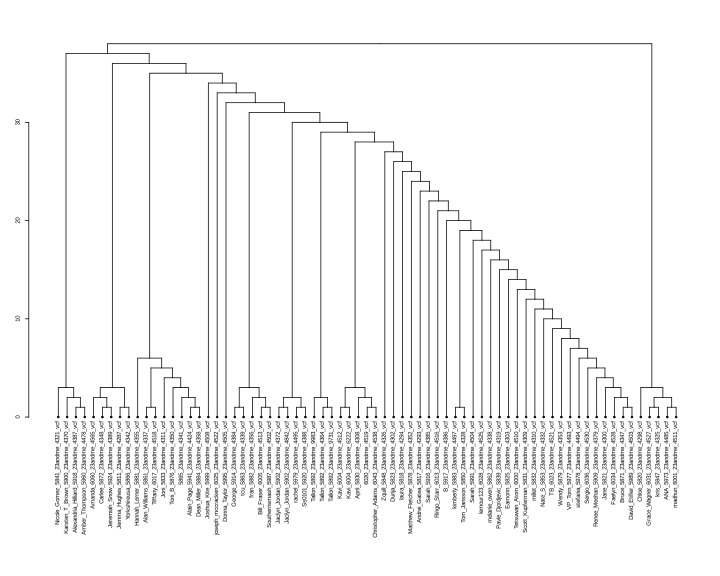

In [46]:
from IPython.display import SVG, display
display(SVG(filename="/content/dendrogram_rect.svg"))

In [6]:
from google.colab import drive
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define the source and destination paths
source_path = "/content/users_and_data.zip"
destination_dir = "/content/drive/My Drive/opensnp_downloader"
destination_path = os.path.join(destination_dir, "users_and_data.zip")

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the file
try:
    shutil.copy(source_path, destination_path)
    print(f"Successfully copied {source_path} to {destination_path}")
except FileNotFoundError:
    print(f"Error: Source file not found at {source_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Mounted at /content/drive
Successfully copied /content/users_and_data.zip to /content/drive/My Drive/opensnp_downloader/users_and_data.zip


In [28]:
!bcftools/bgzip merged.vcf

/bin/bash: line 1: bcftools/bgzip: No such file or directory


In [30]:
!/env/bin/tabix -p vcf merged.vcf.gz

[tabix] the compression of 'merged.vcf.gz' is not BGZF
